In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [72]:
# Load the dataset
data = pd.read_csv("./data/TVC_logger_ 3_betula.csv")

In [73]:
# Data Cleaning
cleaned_data = data.dropna(subset=['Tsoil.C.hummock', 'Tair.C', 'RH.percent', 'VWC.m3.per.m3.hummock'])
cleaned_data.drop(columns=['VWC.m3.per.m3.interhummock'], inplace=True)

# Splitting data into features (X) and target (y)
X = cleaned_data[['Tsoil.C.hummock', 'Tair.C', 'RH.percent']]
y = cleaned_data['VWC.m3.per.m3.hummock']

In [74]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a KNN regressor object
knn_model = KNeighborsRegressor()

best_params = {
    'n_neighbors': 7,
    'weights': 'distance',
    'p': 1 
}
# Train the model with the best hyperparameters
best_knn_model = KNeighborsRegressor(**best_params)
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Save the model to a file
joblib.dump(best_knn_model, 'best_knn_model.joblib')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.12285917869702e-05


In [75]:
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load('best_knn_model.joblib')

# Create a DataFrame with separate input values for testing
test_input = pd.DataFrame({
    'Tsoil.C.hummock': [11.0269, -5.76],  
    'Tair.C': [15.7624, 2.4098],
    'RH.percent': [79.46, 92.9]
})

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(test_input)

# Load the original dataset
data = pd.read_csv("./data/TVC_logger_ 3_betula.csv")

# Filter the original dataset to get actual values for the provided inputs
actual_values = data.loc[(data['Tsoil.C.hummock'].isin(test_input['Tsoil.C.hummock'])) & 
                         (data['Tair.C'].isin(test_input['Tair.C'])) &
                         (data['RH.percent'].isin(test_input['RH.percent'])), 'VWC.m3.per.m3.hummock'].values

# Create a DataFrame to display predicted and actual values side by side
results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': y_pred_loaded})
print("\nPredicted and Actual values for provided inputs:")
print(results_df)



Predicted and Actual values for provided inputs:
   Actual  Predicted
0  0.1368     0.1368
1  0.0250     0.0250


In [76]:
# Print other relevant values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", loaded_model.score(X_test, y_test))
print("Number of neighbors:", loaded_model.n_neighbors)
print("Weights used:", loaded_model.weights)
print("Effective metric:", loaded_model.effective_metric_)

Mean Squared Error: 6.12285917869702e-05
R-squared: 0.9787649650270079
Number of neighbors: 7
Weights used: distance
Effective metric: manhattan


C:\Users\Test\AppData\Local\Temp\ipykernel_18828\3771061563.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


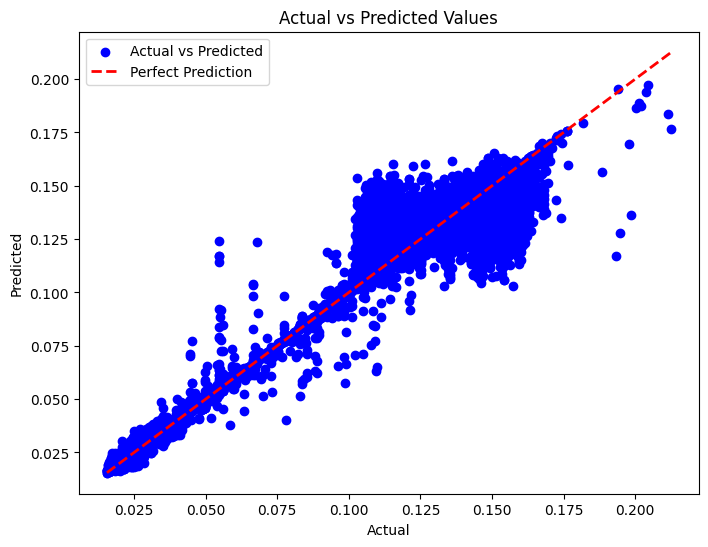

In [77]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [78]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define thresholds for categorization
threshold_low = 0.2
threshold_high = 0.8

# Convert predictions into classes
y_pred_classes = np.where(y_pred < threshold_low, 0, np.where(y_pred > threshold_high, 2, 1))
y_test_classes = np.where(y_test < threshold_low, 0, np.where(y_test > threshold_high, 2, 1))

# Calculate classification metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9996753999536285
Precision: 0.9993509052724472
Recall: 0.9996753999536285
F1-score: 0.9995131262760163


c:\Users\Test\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import pandas as pd

# Read your Excel file into a DataFrame
df = pd.read_csv('./data/TVC_logger_ 3_betula.csv')

# Assuming 'Column_name' is the name of the column you want to find max and min values for
max_value = df['VWC.m3.per.m3.hummock'].max()
min_value = df['VWC.m3.per.m3.hummock'].min()

print("Maximum value:", max_value)
print("Minimum value:", min_value)


Maximum value: 0.2124
Minimum value: 0.01501


In [3]:
import pandas as pd
import joblib
data = []
for line in arduino_output.strip().split('\n'):
    line = line.strip().replace(',', '').split()
    values = {
        'Tsoil.C.hummock': float(line[11]),  
        'Tair.C': float(line[8]),
        'RH.percent': float(line[5])
    }
    data.append(values)
# x="'Soil_Moisture': float(line[2])"
df = pd.DataFrame(data)

# Load the saved model
loaded_model = joblib.load('best_knn_model.joblib')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(df)

print("Predictions:", y_pred_loaded)


ValueError: could not convert string to float: 'Soil'

In [2]:
import serial
import joblib
import pandas as pd
ser = serial.Serial('COM7', 9600)
print("Serial port opened")
try:
    while True:
        if ser.in_waiting > 0:
            data = ser.readline().decode().strip()
            soil_moisture = None
            air_rel_humidity = None
            air_temp_celsius = None
            soil_temp_celsius = None
            values = data.split(',')
            for value in values:
                key, numeric_part = value.split(':')
                key = key.strip()
                numeric_part = numeric_part.strip()
    
                if key == 'Soil Moisture':
                    soil_moisture = float(numeric_part)
                elif key == 'Air Rel Humi':
                    air_rel_humidity = float(numeric_part)
                elif key == 'Air Celcius Temp':
                    air_temp_celsius = float(numeric_part)
                elif key == 'Soil Celsius temperature':
                    soil_temp_celsius = float(numeric_part)

            values = {
                        'Tsoil.C.hummock': soil_temp_celsius,  
                        'Tair.C': air_temp_celsius,
                        'RH.percent': air_rel_humidity
                    }
            input=[]
            input.append(values)
            df = pd.DataFrame(input)
            loaded_model = joblib.load('best_knn_model.joblib')
            y_pred_loaded = loaded_model.predict(df)
            print(f"Actual: {soil_moisture:}  Predictions: {y_pred_loaded[0]:.{5}f}")
            if soil_moisture<y_pred_loaded[0]:
                print("Irrigate")
            else:
                print("Stop irrigating")
            # Print the extracted values
            # print("Soil Moisture:", soil_moisture)
            # print("Air Relative Humidity:", air_rel_humidity)
            # print("Air Celsius Temperature:", air_temp_celsius)
            # print("Soil Celsius Temperature:", soil_temp_celsius)
    
finally:
    ser.close()
    print("Serial port closed")


Serial port opened
Actual: 0.0686353  Predictions: 0.13692
Irrigate
Actual: 0.0686353  Predictions: 0.13669
Irrigate
Actual: 0.0686353  Predictions: 0.13687
Irrigate
Actual: 0.0699059  Predictions: 0.13672
Irrigate
Actual: 0.0699059  Predictions: 0.13668
Irrigate
Actual: 0.0673647  Predictions: 0.13657
Irrigate
Actual: 0.0699059  Predictions: 0.13686
Irrigate
Actual: 0.0686353  Predictions: 0.13669
Irrigate
Actual: 0.0686353  Predictions: 0.13688
Irrigate
Actual: 0.0699059  Predictions: 0.13669
Irrigate
Actual: 0.0686353  Predictions: 0.13688
Irrigate
Actual: 0.0673647  Predictions: 0.13686
Irrigate
Actual: 0.0686353  Predictions: 0.13671
Irrigate
Actual: 0.0673647  Predictions: 0.13671
Irrigate
Actual: 0.0699059  Predictions: 0.13686
Irrigate
Actual: 0.0673647  Predictions: 0.13693
Irrigate
Actual: 0.0673647  Predictions: 0.13672
Irrigate
Actual: 0.0686353  Predictions: 0.13689
Irrigate
Actual: 0.0686353  Predictions: 0.13688
Irrigate
Serial port closed


KeyboardInterrupt: 